## Project Approach for Revenue Optimization

### Step 1: Data Validation
- Validate and clean the data to ensure accuracy and reliability.
- Perform a detailed analysis of each column to identify missing values, outliers and errors.

### Step 2: Exploratory Analysis
- Perform exploratory analysis by visualizing the data to identify main variables influencing revenue generation.
- Generate two different types of graphics showing single variables only and at least one graphic showing two or more variables.

### Step 3: Model Development
- Fit a baseline model to predict revenue based on exploratory analysis.
- Fit a comparison model to compare its performance with the baseline model.

### Step 4: Model Evaluation
- Evaluate the performance of both models and compare them to see which one is better at predicting revenue.
- Identify key variables important for predicting revenue and their impact on the model.

### Step 5: Metric Definition
- Define a metric that the business can use to monitor their progress.
- The metric would help the business track their revenue performance over time and make informed decisions about their business strategy.

### Step 6: Final Summary and Recommendations
- Present findings and recommendations to the Financial Planning Team.
- Recommend specific actions that the business should take to optimize revenue generation while maintaining high-quality patient care. 
- The recommendations would be based on the data and would be actionable and measurable.

#### Deliverables
- A written report with data validation, exploratory analysis, model development, model evaluation, metric definition, and final recommendations.
- A presentation that summarizes the key findings and recommendations to present to the Financial Planning Team.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

health_revenue = pd.read_csv('./health_revenue.csv')
health_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [39]:
health_revenue.isnull().sum()

clinic_id                0
ownership                0
hospital_location        0
admitted_patients        0
nurse_patient_ratio      0
ed_visits                0
satisfaction_score     159
revenue                  0
dtype: int64

In [45]:
health_revenue.fillna(health_revenue['satisfaction_score'].median(), inplace=True)

health_revenue['ownership']  = health_revenue['ownership'].replace({'non_profitt': 'Non-Profit'})
# health_revenue.loc[health_revenue['ed_visits'] < 0, 'ed_visits'] = 0
health_revenue = health_revenue[health_revenue['ed_visits'] >= 0]
health_revenue = health_revenue[health_revenue['hospital_location'] != '-']
# health_revenue['ownership']  = health_revenue['ownership'].cat.rename_categories({'non_profitt' : 'Non-Profit'})
# health_revenue[health_revenue.satisfaction_score > 6]
health_revenue[health_revenue['ed_visits'] < 0]

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue


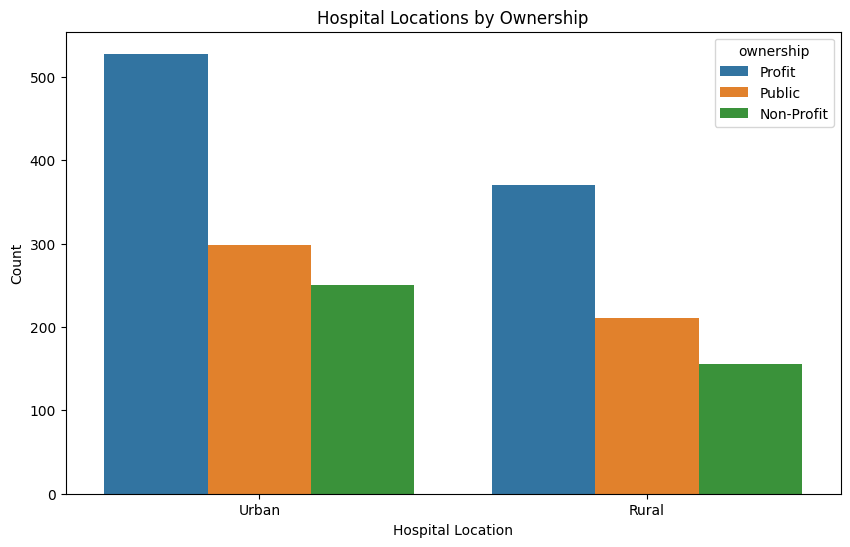

In [46]:
count_df = health_revenue[['hospital_location', 'ownership']].value_counts().reset_index(name='count')

# Create the plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='hospital_location', y='count', hue='ownership', data=count_df)
plt.title('Hospital Locations by Ownership')
plt.xlabel('Hospital Location')
plt.ylabel('Count')
plt.show()

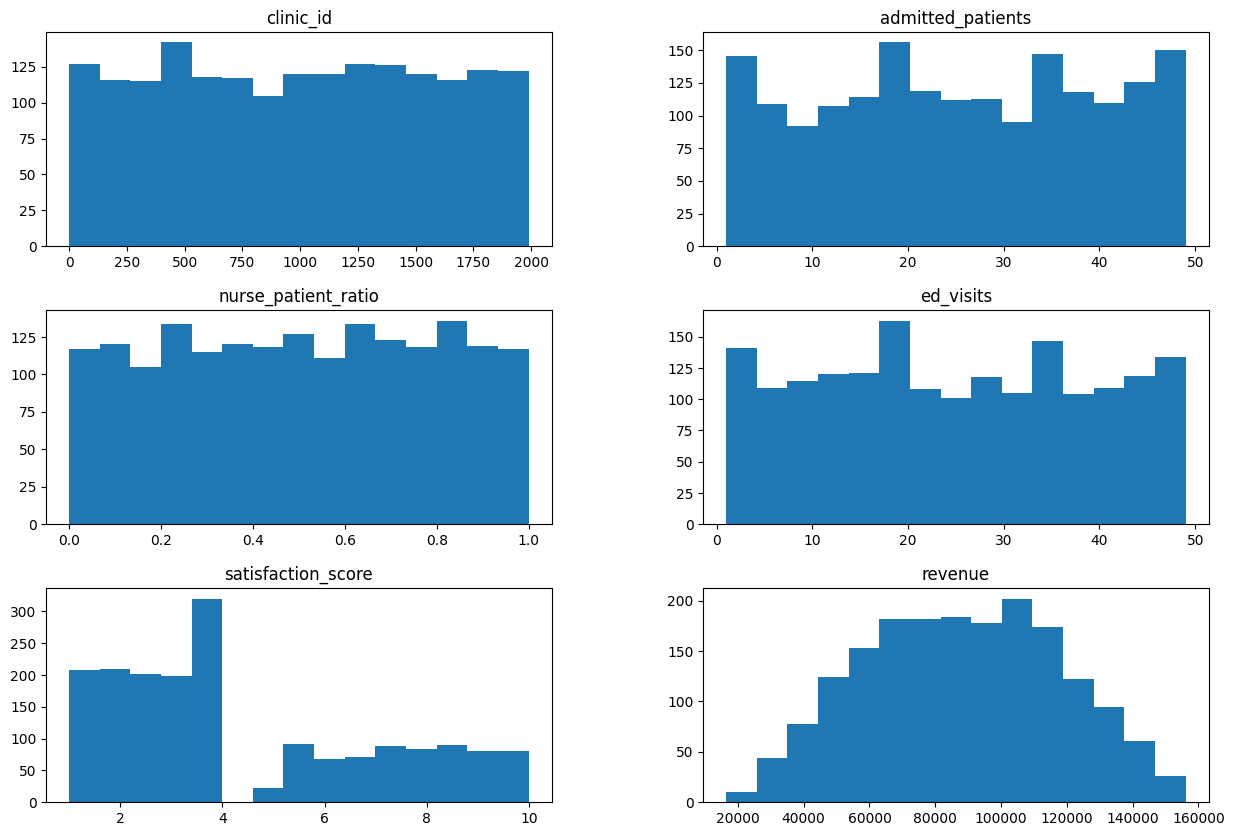

In [47]:
health_revenue.hist(bins=15, figsize=(15,10), grid=False)
plt.show()


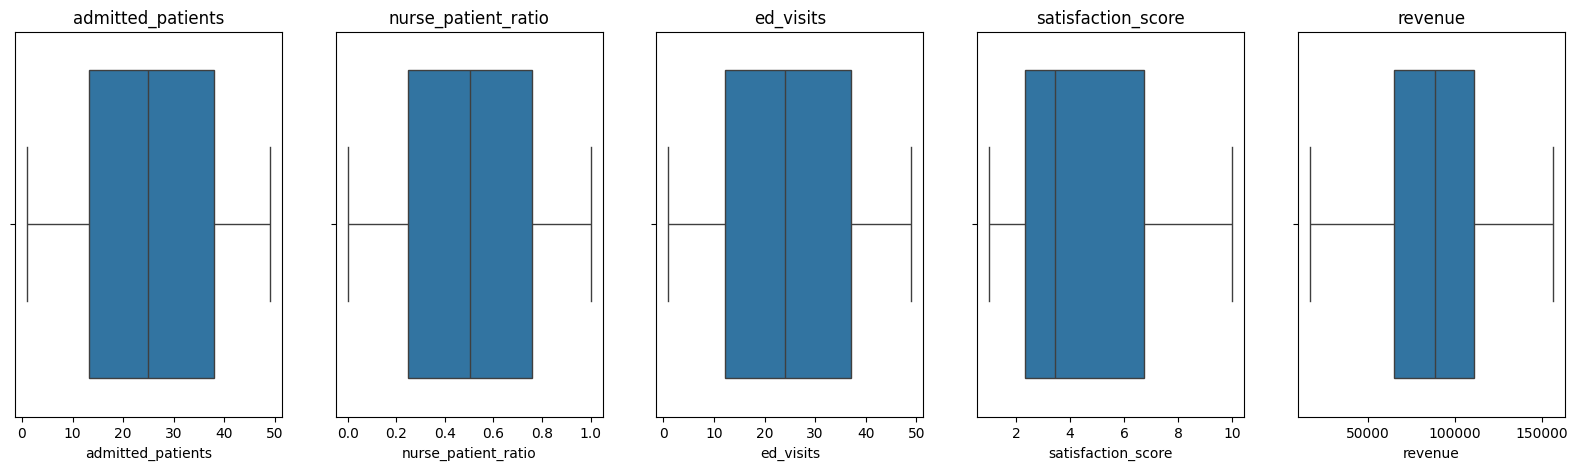

In [48]:
# Check for any outliers in numerical columns using boxplots
num_cols = ['admitted_patients', 'nurse_patient_ratio', 'ed_visits', 'satisfaction_score', 'revenue']
fig, axs = plt.subplots(1, len(num_cols), figsize=(20, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(x=health_revenue[col], ax=axs[i])
    axs[i].set_title(col)

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


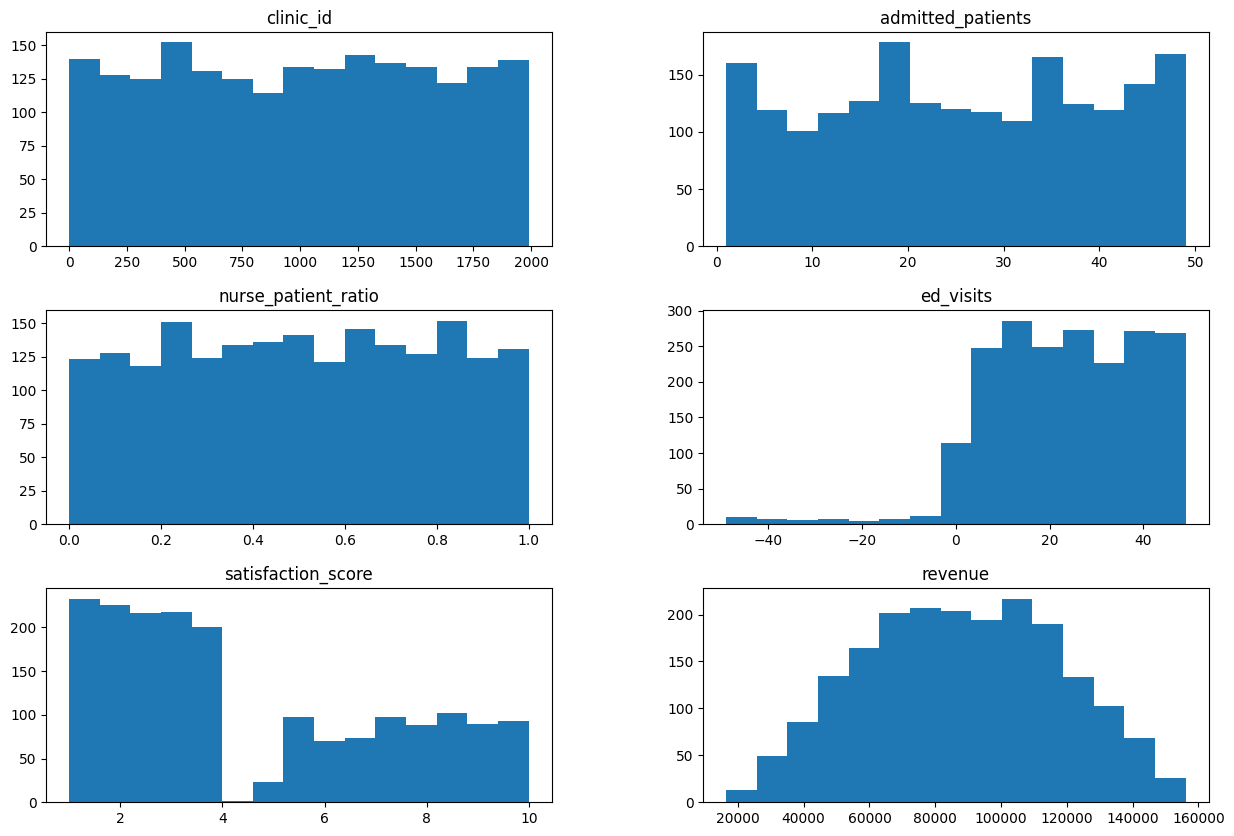

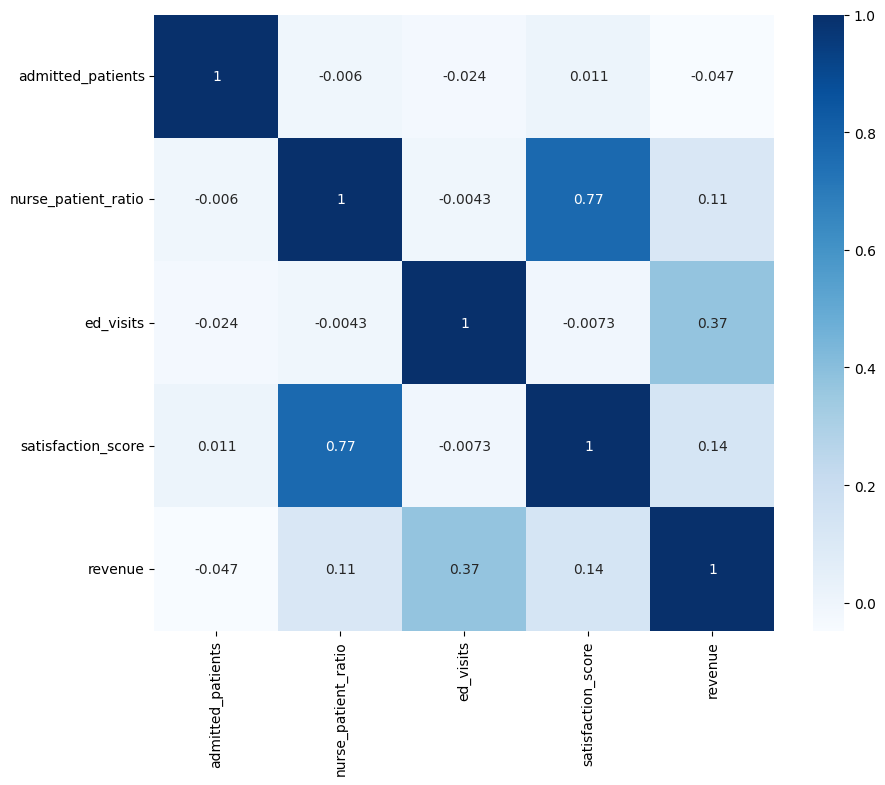

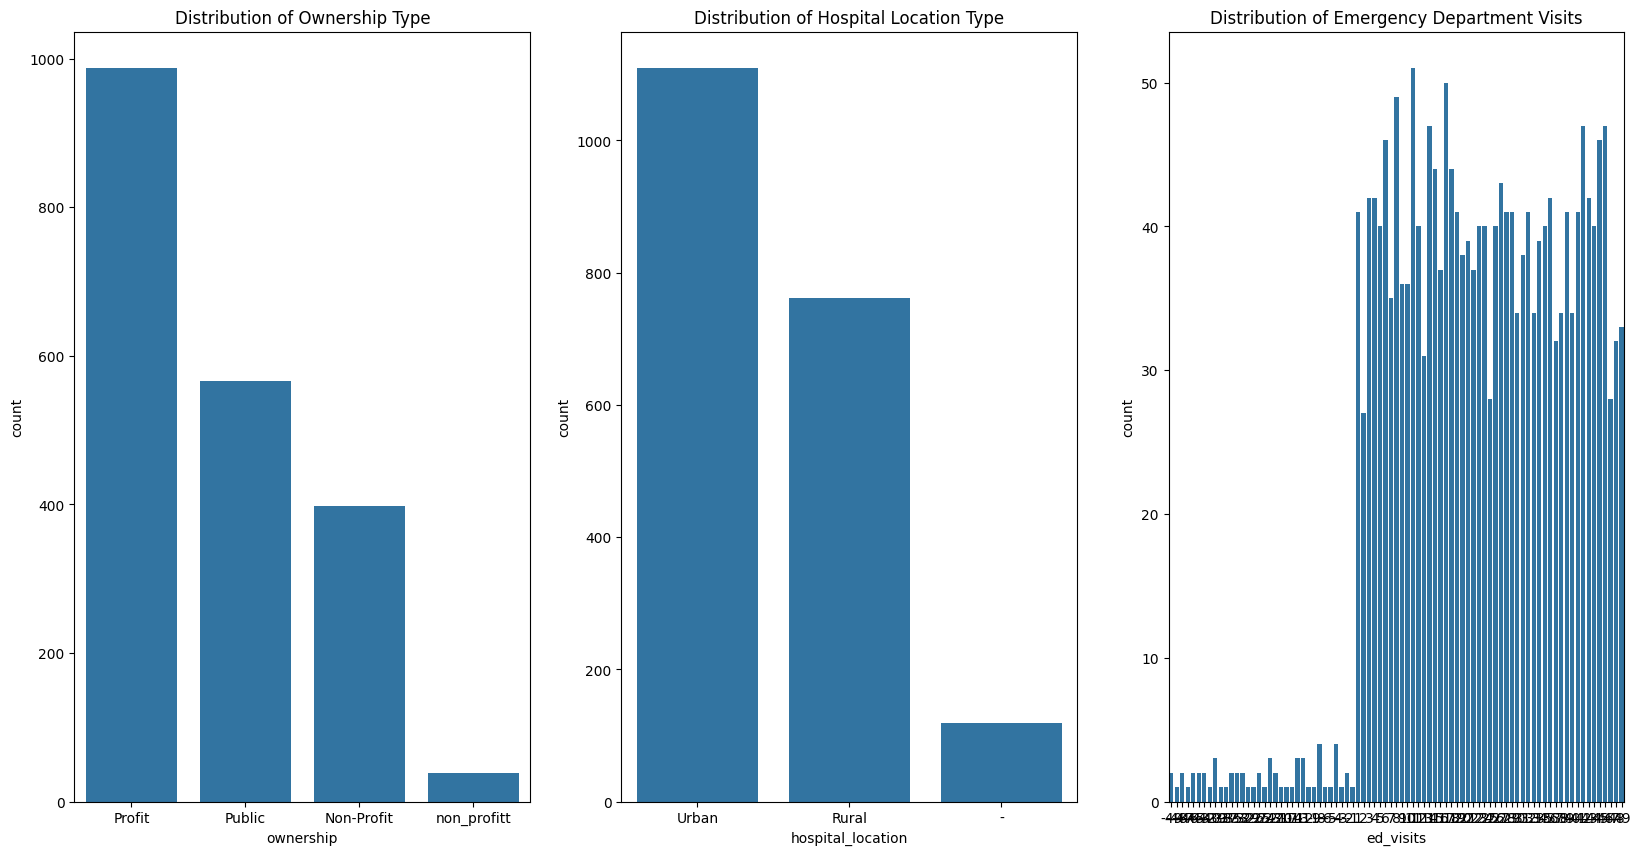

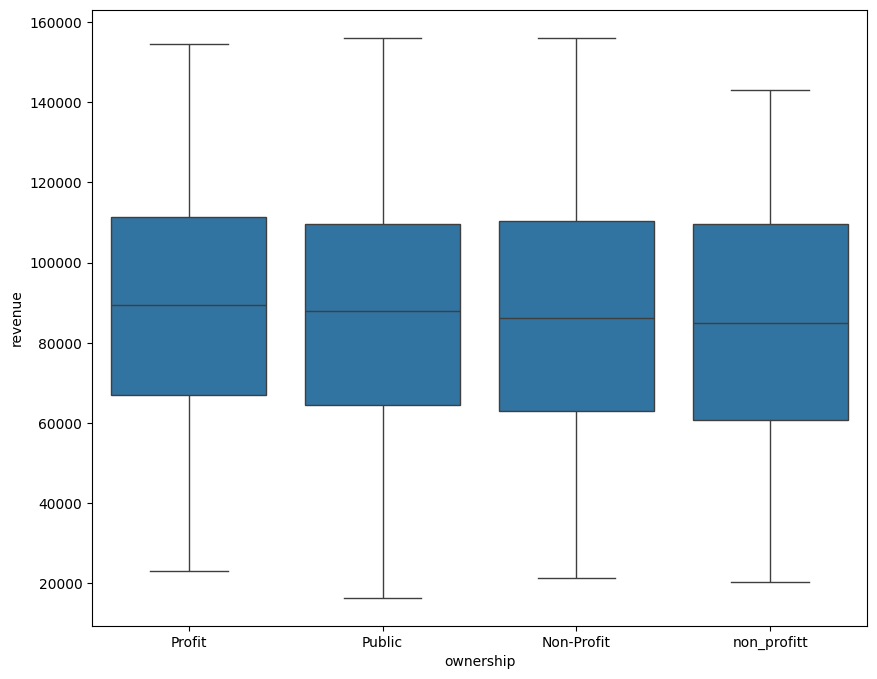

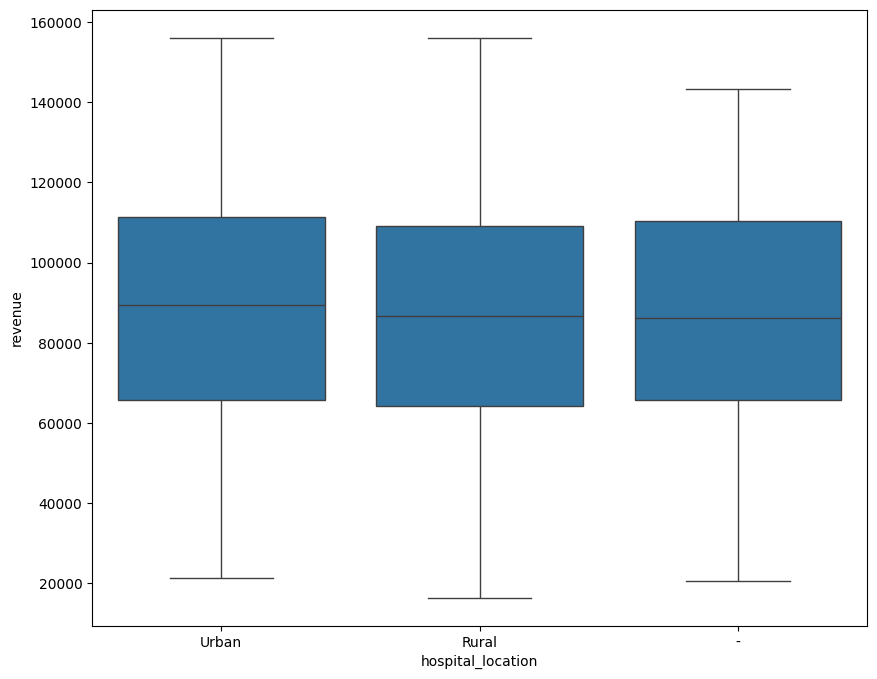

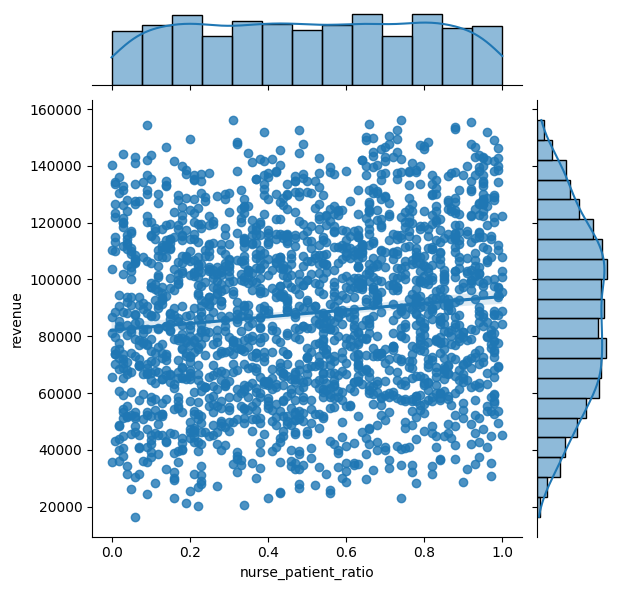

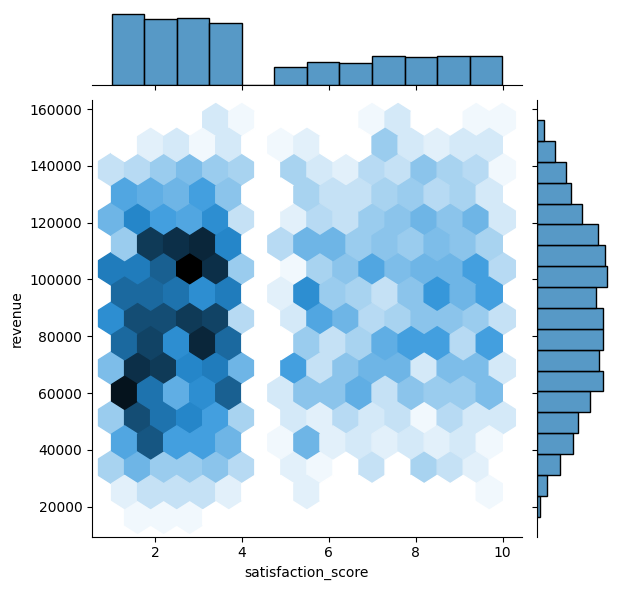

In [75]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset and Creating DataFrame
df = pd.read_csv('health_revenue.csv')

# Analyzing the Data
df.head() # Show top 5 rows
df.info() # Show data types and number of non-null values

# Checking for Missing Values
df.isnull().sum()

# Descriptive Statistics for Numeric Variables
df.describe()

# Distribution of Numeric Variables
df.hist(bins=15, figsize=(15,10), grid=False)

# Correlation Between Numeric Variables
plt.figure(figsize=(10,8))
sns.heatmap(df[['admitted_patients', 'nurse_patient_ratio', 'ed_visits', 'satisfaction_score', 'revenue']].corr(), annot=True, cmap='Blues')

# Distribution of Categorical Variables
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.countplot(x='ownership', data=df)
plt.title('Distribution of Ownership Type')

plt.subplot(1,3,2)
sns.countplot(x='hospital_location', data=df)
plt.title('Distribution of Hospital Location Type')

plt.subplot(1,3,3)
sns.countplot(x='ed_visits', data=df)
plt.title('Distribution of Emergency Department Visits')

# Revenue vs Ownership Type
plt.figure(figsize=(10,8))
sns.boxplot(x='ownership', y='revenue', data=df)

# Revenue vs Hospital Location Type
plt.figure(figsize=(10,8))
sns.boxplot(x='hospital_location', y='revenue', data=df) 

# Revenue vs Nurse to Patient Ratio
sns.jointplot(x='nurse_patient_ratio', y='revenue', data=df, kind='reg')

# Revenue vs Satisfaction Score
sns.jointplot(x='satisfaction_score', y='revenue', data=df, kind='hex')
plt.show()

In [76]:
health_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1990 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [77]:
health_revenue.describe()

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,997.214070,25.400503,0.503251,23.250251,4.429492,88076.974523
std,577.514303,14.144905,0.285727,16.373214,2.657419,29644.679778
min,0.000000,1.000000,0.000000,-49.000000,1.000000,16432.280000
25%,491.250000,14.000000,0.250000,11.000000,2.310000,65186.840000
50%,1003.000000,25.000000,0.500000,24.000000,3.440000,88086.915000
75%,1497.750000,38.000000,0.750000,36.000000,6.805000,110556.667500
max,1989.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


In [78]:
health_revenue.satisfaction_score.round(0).value_counts()

satisfaction_score
3.0     529
2.0     375
1.0     190
4.0     161
8.0     156
9.0     155
7.0     139
6.0     131
10.0     79
5.0      75
Name: count, dtype: int64

In [79]:
health_revenue.hospital_location.value_counts() 

hospital_location
Urban    1109
Rural     762
-         119
Name: count, dtype: int64

In [80]:
health_revenue.clinic_id.value_counts()

clinic_id
1877    7
153     5
991     5
441     5
546     4
       ..
635     1
905     1
88      1
824     1
71      1
Name: count, Length: 1241, dtype: int64

In [15]:
health_revenue.ownership.value_counts()

ownership
Profit        987
Public        566
Non-Profit    437
Name: count, dtype: int64

In [49]:
data = health_revenue.copy()

         clinic_id  admitted_patients  nurse_patient_ratio    ed_visits  \
count  1814.000000        1814.000000          1814.000000  1814.000000   
mean    994.665380          25.358324             0.503280    24.713892   
std     576.573556          14.110960             0.287041    14.047169   
min       0.000000           1.000000             0.000000     1.000000   
25%     488.000000          13.250000             0.250000    12.250000   
50%     994.000000          25.000000             0.505000    24.000000   
75%    1496.000000          38.000000             0.757500    37.000000   
max    1989.000000          49.000000             1.000000    49.000000   

       satisfaction_score        revenue  
count         1814.000000    1814.000000  
mean             4.424531   88298.617696  
std              2.640154   29689.620596  
min              1.000000   16432.280000  
25%              2.312500   64989.012500  
50%              3.440000   88311.040000  
75%              6.7500

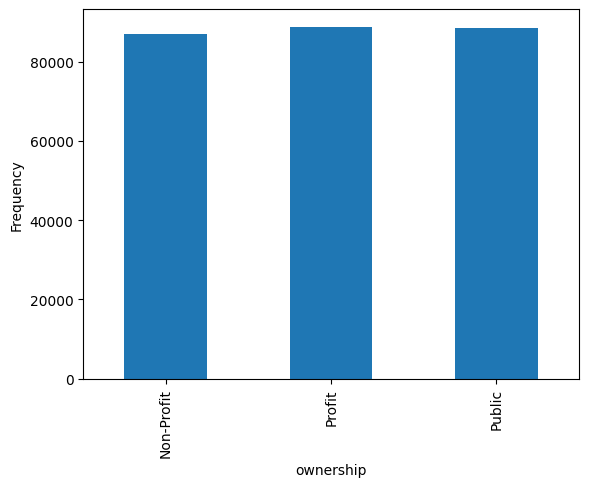

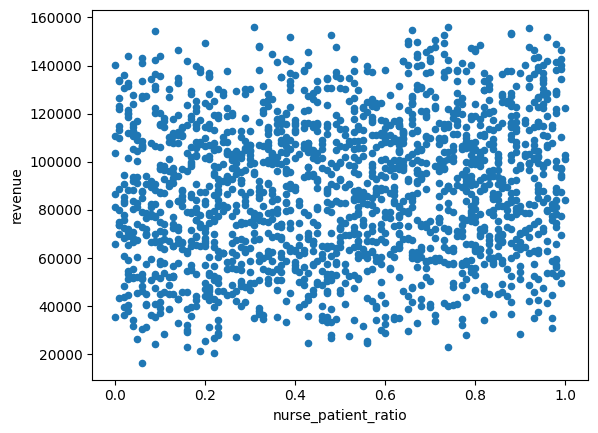

In [50]:
# Summary statistics for each column
print(data.describe())

# Histogram showing distribution of revenue
data['revenue'].plot(kind='hist')

# Bar plot showing ownership types and their mean revenue
data.groupby('ownership')['revenue'].mean().plot(kind='bar')
plt.show()

# Scatter plot showing the relationship between nurse-patient ratio and revenue
data.plot(kind='scatter', x='nurse_patient_ratio', y='revenue')
plt.show()

In [51]:
data.clinic_id.value_counts()

clinic_id
1877    7
991     5
441     5
153     5
1519    4
       ..
461     1
1408    1
1653    1
1529    1
71      1
Name: count, Length: 1173, dtype: int64

In [52]:
data[data['clinic_id'] == 153]


,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
46,153,Public,Urban,19,0.25,32,3.75,93712.79
527,153,Public,Urban,25,0.03,2,1.57,40532.34
592,153,Public,Urban,19,0.07,15,1.76,78532.43
912,153,Profit,Urban,4,0.09,24,2.78,82460.17
1706,153,Non-Profit,Rural,20,0.20,42,3.11,82398.33


In [60]:
data['hospital_location'] =data['hospital_location'].astype('category').cat.codes
data['ownership'] = data['ownership'].astype('category').cat.codes

In [63]:
data.head()

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,1,1,23,0.40,12,2.04,55684.18
1,422,1,1,22,0.60,11,2.77,117115.85
2,1843,2,0,47,0.37,31,3.13,72794.56
3,14,0,1,20,0.06,47,1.30,87447.23
4,1880,2,0,33,0.94,40,5.90,88848.01


In [69]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# X = data.drop(['revenue','hospital_location','ownership','clinic_id'], axis=1)
X = data.drop(['revenue','clinic_id'], axis=1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Fitting a baseline model using linear regression
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Fitting a comparison model using random forest regression
from sklearn.ensemble import RandomForestRegressor

comparison_model = RandomForestRegressor()
comparison_model.fit(X_train, y_train)

# Evaluating the performance of each model on the test set
from sklearn.metrics import mean_absolute_error, r2_score
baseline_pred = baseline_model.predict(X_test)
comparison_pred = comparison_model.predict(X_test)

print('Baseline model MAE and R2:', mean_absolute_error(y_test, baseline_pred), r2_score(y_test, baseline_pred))
print('Comparison model MAE and R2:', mean_absolute_error(y_test, comparison_pred), r2_score(y_test, comparison_pred))

Baseline model MAE and R2: 22331.276917905412 0.2597607085922604
Comparison model MAE and R2: 23117.72373656388 0.18356868928870052


In [75]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# X = data.drop(['revenue','hospital_location','ownership','clinic_id'], axis=1)
X = data.drop(['revenue','clinic_id'], axis=1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# # split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a dictionary of models to test
models = {"Random Forest": RandomForestRegressor(),
          "LinearRegression" : LinearRegression(),
          "KNN": KNeighborsRegressor(), 
          "Ridge": Ridge(), 
          "Lasso": Lasso(), 
          "SVM": SVR(), 
          "Decision Tree": DecisionTreeRegressor(random_state= 123)}

rmse_results = []
predictions = []
for model in models.values():
    '''I iteratively fit the model and generates predictions. Here I first fit the model and store the first results. Then I do a cross validation to display distribution of model performance.'''
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    
    kf = KFold(n_splits = 6, random_state= 123, shuffle = True)
    cv_results = - cross_val_score(model,X_train,y_train,cv = kf,scoring = 'neg_mean_squared_error')
    cv_results_root = np.sqrt(cv_results)
    rmse_results.append(cv_results_root)

# train each model and get the performance metrics
for name, model in models.items():
    # train the model
    model.fit(X_train_scaled, y_train)
    # predict on the test set
    y_pred = model.predict(X_test_scaled)
    # calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # print the results
    print(name + " test results:")
    print("RMSE = ", rmse)
    print("R^2 = ", r2)
    print("\n")

Random Forest test results:
RMSE =  27032.158293694698
R^2 =  0.19034793963274166


LinearRegression test results:
RMSE =  25847.442383728885
R^2 =  0.2597607085922604


KNN test results:
RMSE =  28865.506660693267
R^2 =  0.0768009449741811


Ridge test results:
RMSE =  25848.033369128752
R^2 =  0.25972685800012996


Lasso test results:
RMSE =  25847.549976008137
R^2 =  0.2597545459555761


SVM test results:
RMSE =  30095.924795034236
R^2 =  -0.0035808543628625955


Decision Tree test results:
RMSE =  38183.62296950751
R^2 =  -0.6154415455927691




<function matplotlib.pyplot.show(close=None, block=None)>

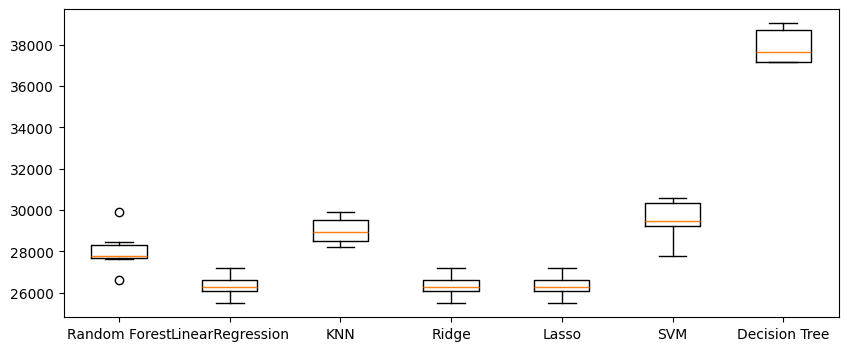

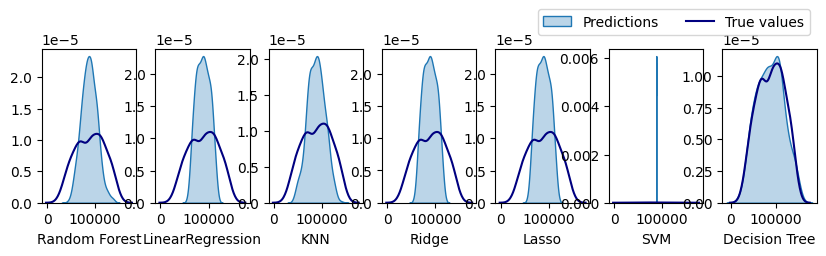

In [77]:
from sklearn.model_selection import KFold, cross_val_score

# Basic single learners
# models = {"KNN": KNeighborsRegressor(), "Ridge": Ridge(), "Lasso": Lasso(), "SVM": SVR(), "Decision Tree": DecisionTreeRegressor(random_state= 123)}

rmse_results = []
predictions = []
for model in models.values():
    '''I iteratively fit the model and generates predictions. Here I first fit the model and store the first results. Then I do a cross validation to display distribution of model performance.'''
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    
    kf = KFold(n_splits = 6, random_state= 123, shuffle = True)
    cv_results = - cross_val_score(model,X_train,y_train,cv = kf,scoring = 'neg_mean_squared_error')
    cv_results_root = np.sqrt(cv_results)
    rmse_results.append(cv_results_root)


fig,ax = plt.subplots(figsize = (10,4))
ax.boxplot(rmse_results, labels = models.keys())

fig2,axes = plt.subplots(1,7,figsize = (10,2))
for i, model_name in enumerate(models.keys()):
    ax = sns.kdeplot(predictions[i],ax = axes[i],fill = True, alpha = 0.3,label = 'Predictions')
    ax = sns.kdeplot(y_test,linewidth = 1.5, ax = axes[i], color = 'navy',label = 'True values')
    ax.set_ylabel(None)
    ax.set_xlabel(model_name)
# axes[2].set_ylim([0,1.2])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, fontsize=10,ncols = 2, loc='upper right',bbox_to_anchor=(1,1.3))
plt.show